<a href="https://colab.research.google.com/github/stellargr/StatModeling_MSDS22/blob/main/country_wealth_and_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

### Name: Stella Voutsina hw5

In [ ]:
# Importing the libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation, title):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.2f',linewidths=0.3,annot_kws={"size": 12})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    #lim = len(correlation.columns)
    #ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [ ]:
# Importing the data
dataset = pd.read_csv("Country-data.csv")
dataset.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [ ]:
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
dataset.shape

(167, 10)

The dataset has 10 columns and 167 rows

### Preprocessing the Data

In [ ]:
# Checking for missing values
dataset.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataset has no missing values

In [ ]:
# Separating data into features and target
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0:1]

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Performing Principal Component Analysis

In [ ]:
# Creating the PCA model
n_components = 2
pca = PCA(n_components=n_components)

In [ ]:
X.shape

(167, 9)

In [ ]:
# Fitting the PCA model to the dataset
X_PCA = pca.fit_transform(X)

In [ ]:
X_PCA = pd.DataFrame(X_PCA, columns = ["pca_1", "pca_2"])
X_PCA.head()

,pca_1,pca_2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659


### Interpreting the meaning of the principal components

The best way to interpret the principal components is by computing the correlations between the original data and each principal component.

We use the correlations between the first two principal components and the original features to interpret these principal components.

In [ ]:
df_correlation = pd.concat([dataset, X_PCA], axis=1, join='inner')
df_correlation.drop("country", axis = 1, inplace = True)
display(df_correlation)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pca_1,pca_2
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.820631,0.639570
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.551036,-1.233886
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.498524,1.390744
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-1.887451,-0.109453


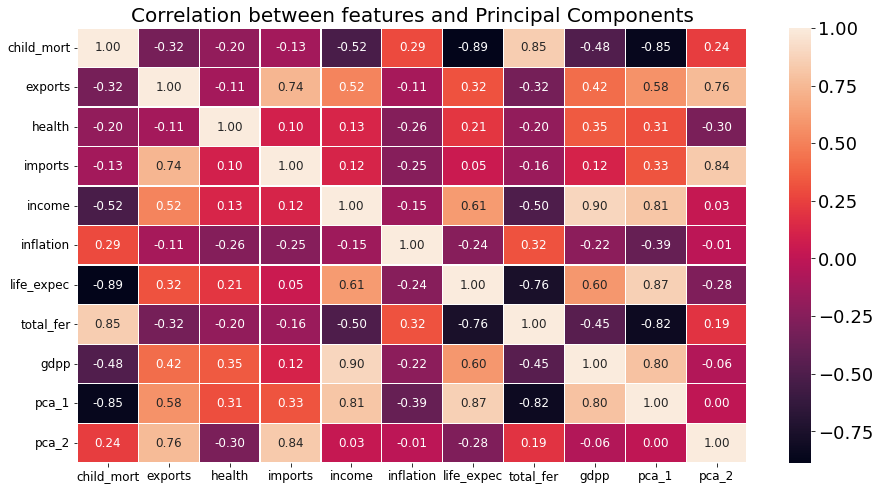

In [ ]:
plot_heatmap(df_correlation.corr(), 'Correlation between features and Principal Components')

From the correlation plot above we can see that the frist principal component has a high extremely high correlation with Child Mortality (**-0.85**), Income (**0.81**), Life Expectancy (**0.87**), Total Fertility (**-0.82**) and GDP (**0.8**). this means that this principal component explains most of the variance in these above named features.

The second principal component on the other hand has high correlations with Exports (**0.76**) and Imports(**0.84**).

The cross correlation betweenm the two principal components is **zero** meaning that the two components are almost orthogonal i.e explain different features and are uncorrelated.

We can conclude that the first principal component gives a measure of **Child Mortality**, **Income**, **Life Expectancy**, **Total Fertility** and **GDP** while the seconf principal component gives a measure of **Imports** and **Exports**.

### Investigating the Explained Variance of the First two Principal Components

In [ ]:
# Checking the explained variance
explained_variance = list(pca.explained_variance_ratio_)
others = 1 - sum(explained_variance)
explained_variance

[0.45951739786095896, 0.17181625651618218]

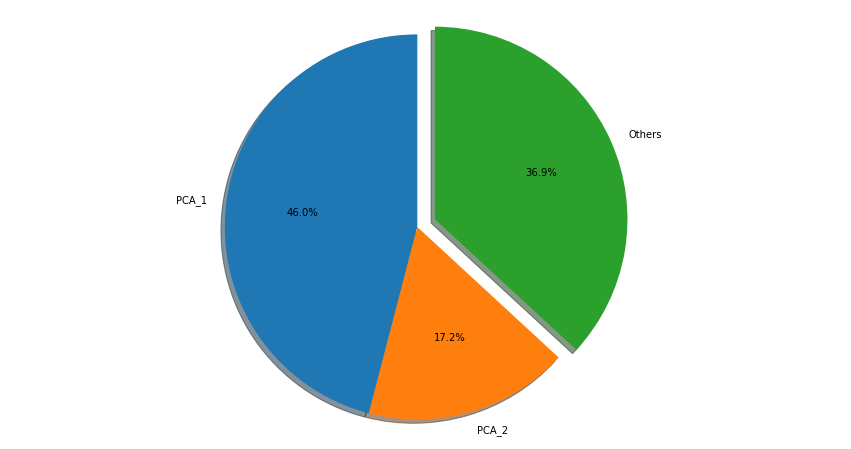

In [ ]:
labels = ['PCA_1', 'PCA_2', 'Others']
sizes = explained_variance + [others]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()

This shows that the first principal component explains **46%** of the variance in the data and the second principal component explains **17%** of the variance in data. Combined, they explain 63% of the variance in the data.

### Investigating Relationship Between Principal Components and Countries

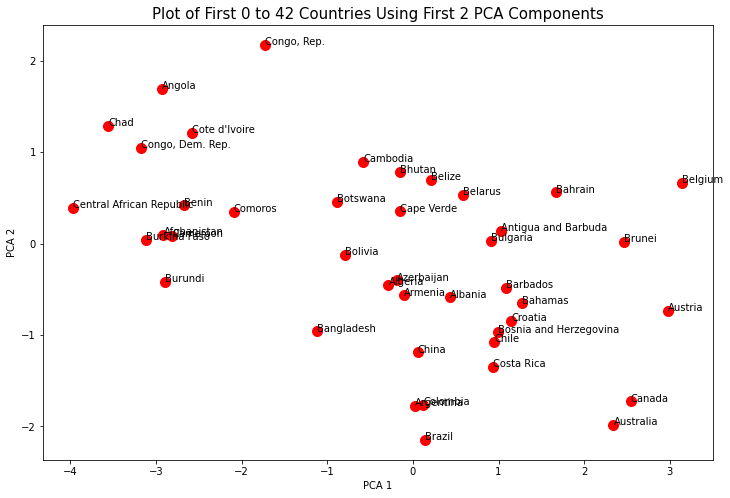

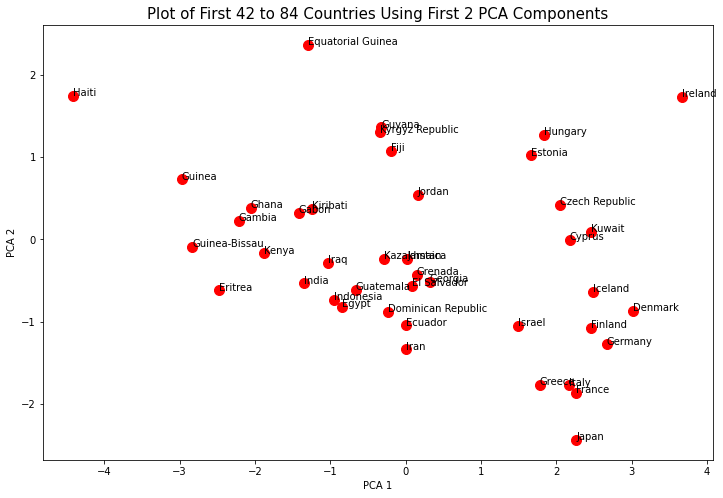

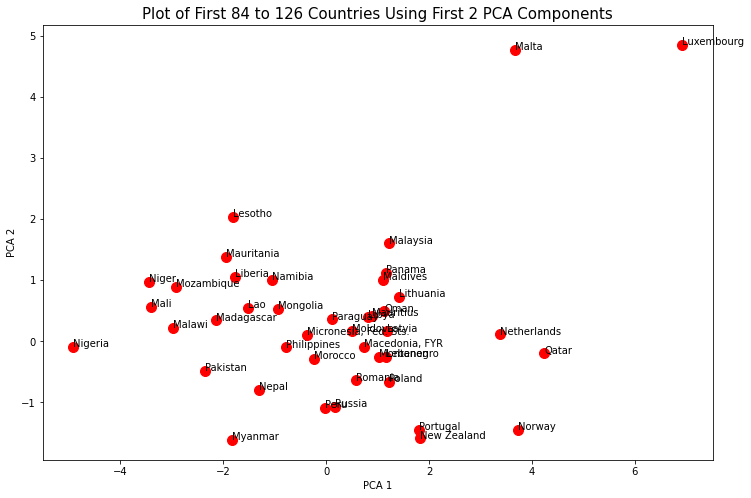

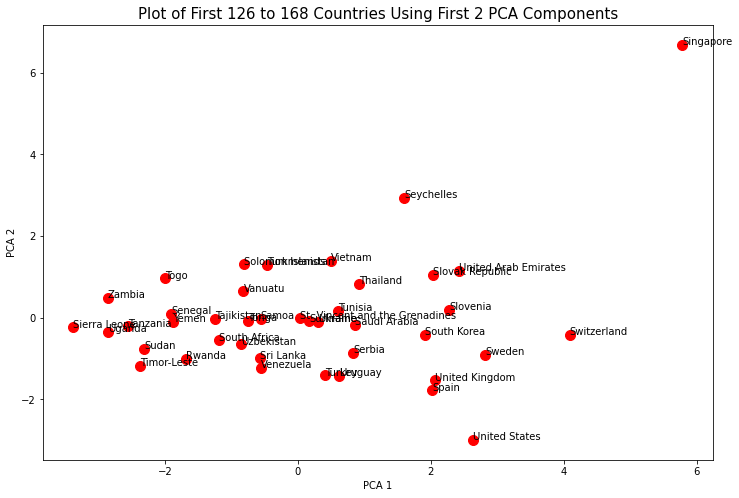

In [ ]:
# Plotting the countries using their principal components
PCA_data = X_PCA
PCA_data["country"] = y["country"]

for i in range(4):
    low = 42 * i
    high = 42 * (i + 1)
    plt.figure(figsize=(12, 8))
    plt.scatter(PCA_data.pca_1[low:high], PCA_data.pca_2[low:high], s=100, color="red")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    title = "Plot of First " + str(low) + " to " + str(high) + " Countries Using First 2 PCA Components"
    plt.title(title, fontsize=15)
    for j, label in enumerate(PCA_data.country[low:high]):
        plt.annotate(label, (PCA_data.pca_1[low + j], PCA_data.pca_2[low + j]))

    plt.show()

In [ ]:
# Using plotly for better visualization
fig = px.scatter(PCA_data, x = "pca_1", y = "pca_2",
                 hover_name = "country",
                 color = "country",
                 title = "Interactive Plot of Countries Using First 2 PCA Components",
                 hover_data={"country":False})

fig.show("notebook")

From the plots, it can be observed that most African countries are towards the left hand side of the chart with a negative value of PCA_1.

Most of the European countries have a negative value for PCA_2 and a positive value in the range 0 to 2 for PCA_1.

Singapore and Luxembourg stand out with PCA_1 values around 6 and PCA_2 values above 4